In [ ]:
import numpy as np
import logging
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import logging
import os

# Ensure logs directory exists
os.makedirs("logs", exist_ok=True)

# Define log file path
log_file_path = os.path.join("logs", "logs.txt")

# Configure logging
logging.basicConfig(filename=log_file_path, level=logging.INFO,
                    format="%(asctime)s - %(levelname)s - %(message)s",
                    filemode="w")  # Change from "w" to "a" to append logs

console = logging.StreamHandler()
console.setLevel(logging.INFO)
formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
console.setFormatter(formatter)
logging.getLogger("").addHandler(console)

In [ ]:
def load_data():
    logging.info("Loading dataset...")
    categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
    train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
    test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

    # Save dataset
    os.makedirs("dataset", exist_ok=True)
    with open("dataset/train_data.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(train.data))
    with open("dataset/test_data.txt", "w", encoding="utf-8") as f:
        f.write("\n".join(test.data))
    np.savetxt("dataset/train_labels.txt", train.target, fmt="%d")
    np.savetxt("dataset/test_labels.txt", test.target, fmt="%d")

    logging.info("Dataset saved successfully.")
    return train, test

In [ ]:
def prepare_features(train, test):
    logging.info("Vectorizing text using TF-IDF...")
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train.data)
    X_test = vectorizer.transform(test.data)
    return X_train, X_test, vectorizer

In [ ]:
def train_model(X_train, y_train):
    logging.info("Training Multinomial Naive Bayes model...")
    model = MultinomialNB()
    model.fit(X_train, y_train)
    logging.info("Model training completed.")
    return model

In [ ]:
def evaluate_model(model, X_test, y_test):
    logging.info("Evaluating model...")
    y_pred = model.predict(X_test)
    mat = confusion_matrix(y_test, y_pred)

    logging.info(f"Confusion Matrix:\n{mat}")
    np.savetxt("dataset/confusion_matrix.txt", mat, fmt="%d")

    return mat

In [ ]:
def plot_confusion_matrix(mat, categories):
    logging.info("Plotting confusion matrix...")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=categories, yticklabels=categories)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.tight_layout()
    plt.savefig("dataset/confusion_matrix.png")
    plt.show()
    logging.info("Confusion matrix saved as 'dataset/confusion_matrix.png'.")

In [ ]:
def predict_category(text, vectorizer, model, target_names):
    logging.info(f"Predicting category for input text: {text}")
    X = vectorizer.transform([text])
    y = model.predict(X)[0]
    logging.info(f"Predicted category: {target_names[y]}")
    return target_names[y]

In [ ]:
logging.info("Script execution started.")

In [ ]:
# Load data
train, test = load_data()

In [ ]:
# Prepare features
X_train, X_test, vectorizer = prepare_features(train, test)

In [ ]:
# Train model
model = train_model(X_train, train.target)

In [ ]:
# Evaluate model
confusion_mat = evaluate_model(model, X_test, test.target)

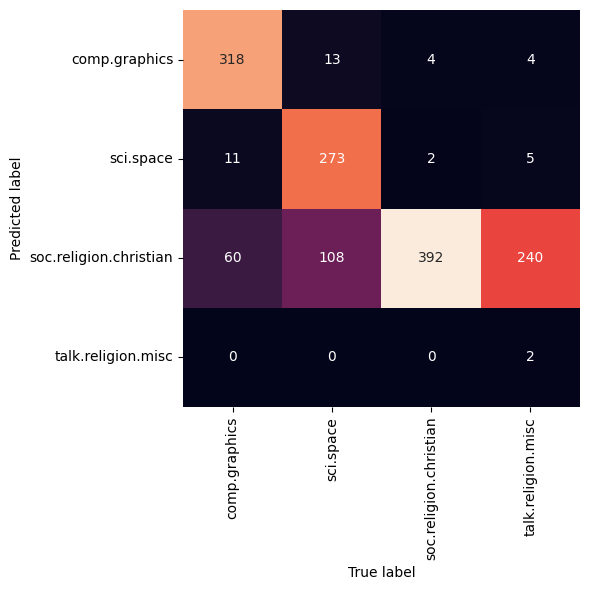

In [ ]:
# Plot results
plot_confusion_matrix(confusion_mat, train.target_names)

In [ ]:
# prediction
sample_text = "The church and religion have been an important part of human history"
predicted_category = predict_category(sample_text, vectorizer, model, train.target_names)
print(f"Predicted category: {predicted_category}")

logging.info("Script execution completed.")

Predicted category: soc.religion.christian
